### Project Definition:
**Project Title:** Predictive Analysis of Horse Health Outcomes Using Historical Patient Data  
**Objective:** Analyze and predict horse outcomes (`lived`, `died`) based on various medical indicators


### Project Link:
https://www.kaggle.com/competitions/playground-series-s3e22/data?select=train.csv



### Challenge Description:
The challenge is to leverage horse medical historical data to understand factors contributing to survival and mortality. This involves handling a mix of categorical and numerical features, missing data, and class imbalance. 


### Data Description:
The dataset consists of 29 features collected from horse records, including:

1. **Numerical Features**: Measurements like `rectal_temp`, `pulse`, `respiratory_rate`, and `total_protein` provide vital sign and test data.
2. **Categorical Features**: Information like `surgery`, `age`, `temp_of_extremities`, and `pain` represent clinical observations and classifications.
3. **Binary Features**: Indicators like `surgical_lesion` or `cp_data` show binary (yes/no) conditions.

The target variable, `outcome`, indicates whether the horse `lived` or `died`. The data presents a mix of clean and missing values, requiring preprocessing before modeling.


### Data Loading and Initial Look:

In [20]:
file_path = 'train(1).csv'
data = pd.read_csv(file_path)

num_rows, num_features = data.shape

num_rows, num_features


(1235, 28)

In [21]:
missing_values = data.isnull().sum()

missing_values_total = missing_values.sum()
missing_values_total

0

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

filename = "train(1).csv" 

VarNames = [
    "surgery", "age", "hospital_id", "rectal_temp", "pulse", "respiratory_rate",
    "extremity_temp", "peripheral_pulse", "mucous_color", "cap_refill_time",
    "pain_level", "peristalsis_activity", "abd_distention", "nasogastric_status",
    "nasogastric_reflux", "reflux_ph", "feces_rectal_exam", "abdomen_status",
    "PCV", "total_protein", "abdomen_appearance", "abdomen_protein",
    "surgical_lesion", "lesion_1_location", "lesion_2_location", 
    "lesion_3_location", "clinical_path_data", "outcome"
]

df = pd.read_csv(filename, names=VarNames, skiprows=1)  

print(df.head())

  surgery    age  hospital_id  rectal_temp  pulse  respiratory_rate  \
0     yes  adult       530001         38.1  132.0              24.0   
1     yes  adult       533836         37.5   88.0              12.0   
2     yes  adult       529812         38.3  120.0              28.0   
3     yes  adult      5262541         37.1   72.0              30.0   
4      no  adult      5299629         38.0   52.0              48.0   

  extremity_temp peripheral_pulse   mucous_color cap_refill_time  ...   PCV  \
0           cool          reduced  dark_cyanotic      more_3_sec  ...  57.0   
1           cool           normal  pale_cyanotic      more_3_sec  ...  33.0   
2           cool          reduced      pale_pink      less_3_sec  ...  37.0   
3           cold          reduced      pale_pink      more_3_sec  ...  53.0   
4         normal           normal    normal_pink      less_3_sec  ...  47.0   

  total_protein abdomen_appearance abdomen_protein surgical_lesion  \
0           8.5      serosan

In [23]:
import pandas as pd

data_cleaned = pd.read_csv("train(1).csv")

numerical_vars = [
    "hospital_number", "rectal_temp", "pulse", "respiratory_rate", "nasogastric_reflux_ph",
    "packed_cell_volume", "total_protein", "abdomo_protein", "surgical_lesion", "lesion_1",
    "lesion_2", "lesion_3"
]

print("\nDescriptive Statistics for Numerical Variables:")
print(data_cleaned[numerical_vars].describe())



Descriptive Statistics for Numerical Variables:
       hospital_number  rectal_temp        pulse  respiratory_rate  \
count     1.235000e+03  1235.000000  1235.000000       1235.000000   
mean      9.545004e+05    38.202186    79.574089         30.054251   
std       1.356403e+06     0.788668    29.108638         16.452066   
min       5.213990e+05    35.400000    30.000000          8.000000   
25%       5.288000e+05    37.800000    53.000000         18.000000   
50%       5.297770e+05    38.200000    76.000000         28.000000   
75%       5.341450e+05    38.600000   100.000000         36.000000   
max       5.305129e+06    40.800000   184.000000         96.000000   

       nasogastric_reflux_ph  packed_cell_volume  total_protein  \
count            1235.000000         1235.000000    1235.000000   
mean                4.382591           49.602429      21.388016   
std                 1.937357           10.535800      26.676453   
min                 1.000000           23.000000    

In [24]:
import pandas as pd

data_cleaned = pd.read_csv("train(1).csv")

categorical_vars = data_cleaned.select_dtypes(include=['object']).columns
numerical_vars = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
binary_vars = [col for col in data_cleaned.columns if data_cleaned[col].nunique() == 2]

print("Variable Type Counts:")
print(pd.DataFrame({
    'Variable Type': ['Categorical', 'Num', 'Binary'],
    'Count': [len(categorical_vars), len(numerical_vars), len(binary_vars)]
}))

print("\nClassified Variables:")
details = [
    {'Variable': col, 'Unique Values': data_cleaned[col].nunique(),
     'Variable Type': 'Categorical' if col in categorical_vars else (
         'Binary' if col in binary_vars else 'Num')}
    for col in data_cleaned.columns
]
print(pd.DataFrame(details))

Variable Type Counts:
  Variable Type  Count
0   Categorical     17
1           Num     11
2        Binary      5

Classified Variables:
                 Variable  Unique Values Variable Type
0                 surgery              2   Categorical
1                     age              2   Categorical
2         hospital_number            255           Num
3             rectal_temp             43           Num
4                   pulse             50           Num
5        respiratory_rate             37           Num
6     temp_of_extremities              4   Categorical
7        peripheral_pulse              4   Categorical
8         mucous_membrane              6   Categorical
9   capillary_refill_time              3   Categorical
10                   pain              6   Categorical
11            peristalsis              5   Categorical
12   abdominal_distention              4   Categorical
13       nasogastric_tube              3   Categorical
14     nasogastric_reflux             

### Data Visualization:

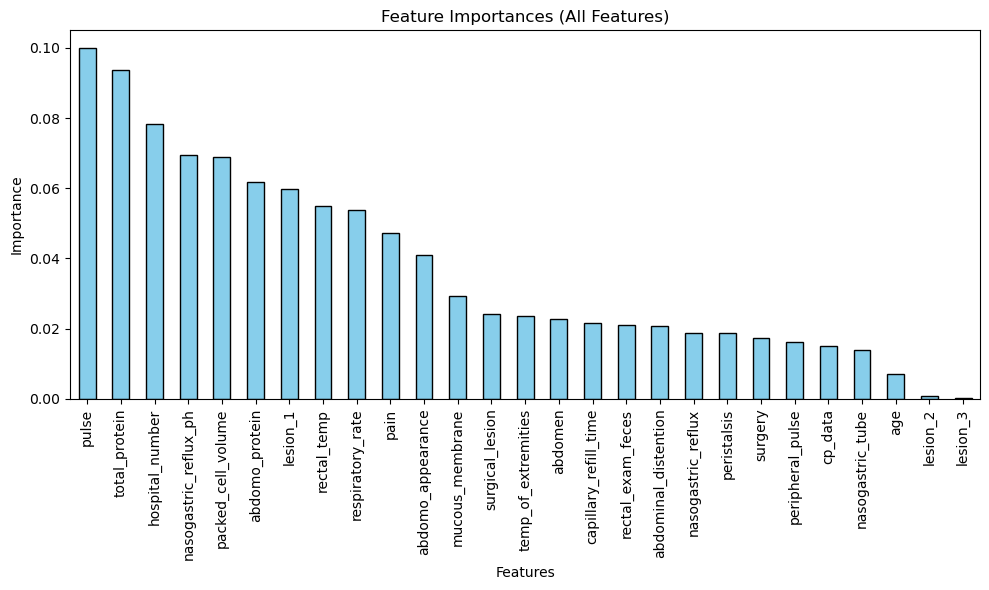

In [28]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Feature Importances (All Features)")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

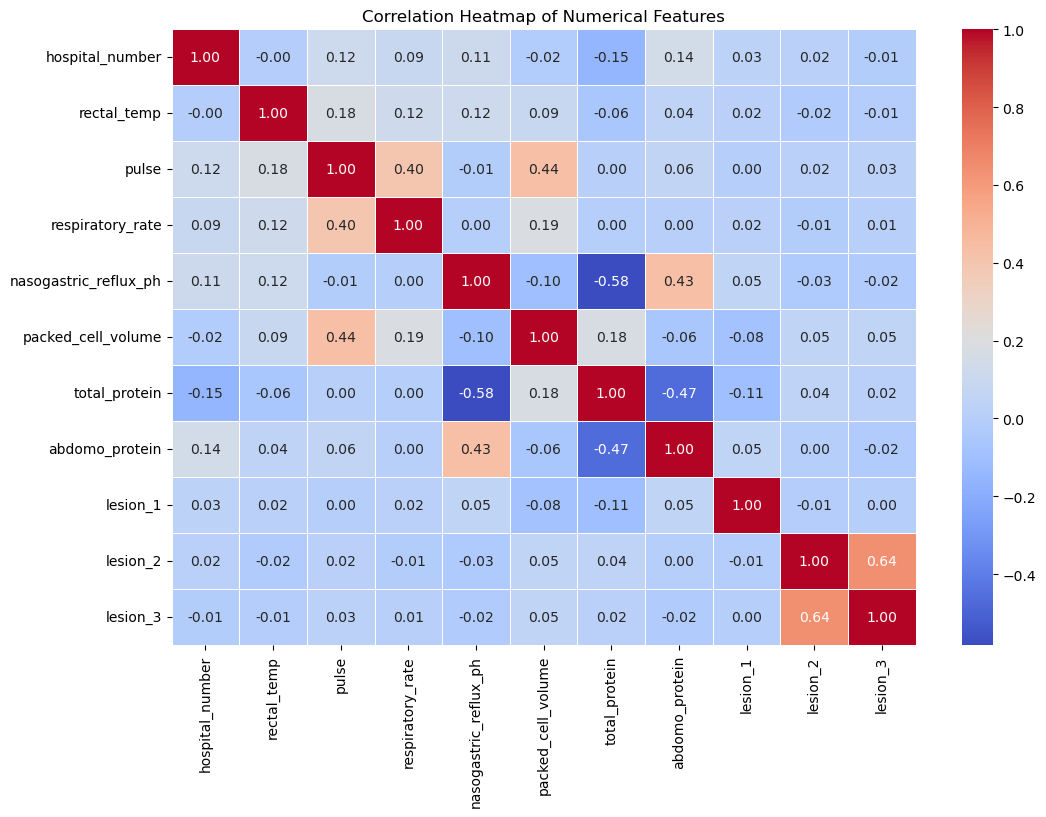

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = data_cleaned[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### Numerical features

total_protein


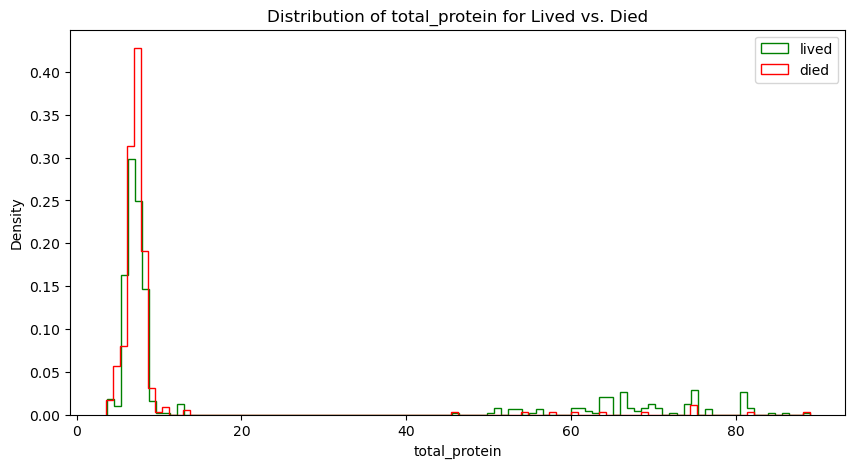

rectal_temp


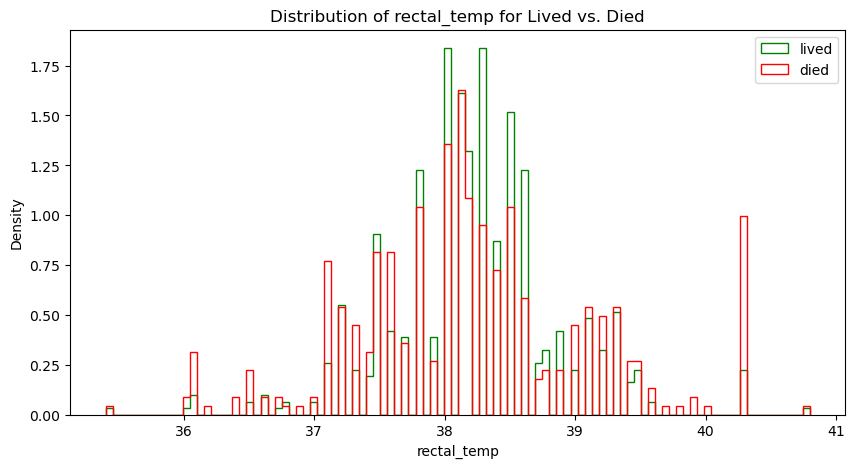

pulse


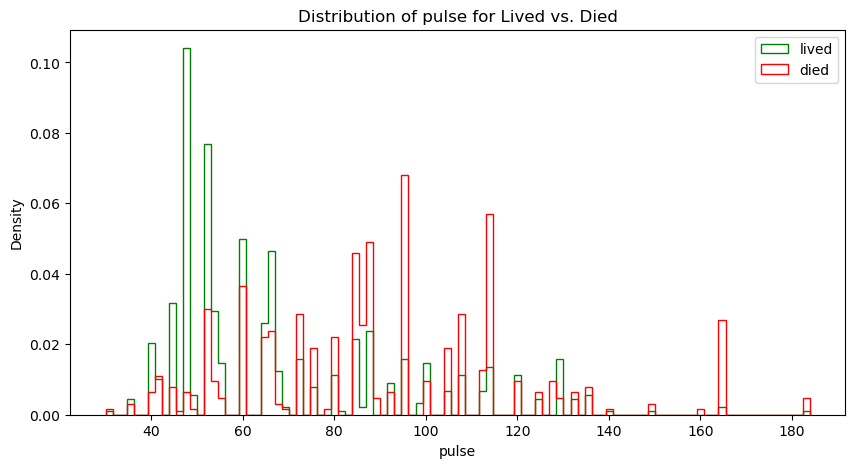

respiratory_rate


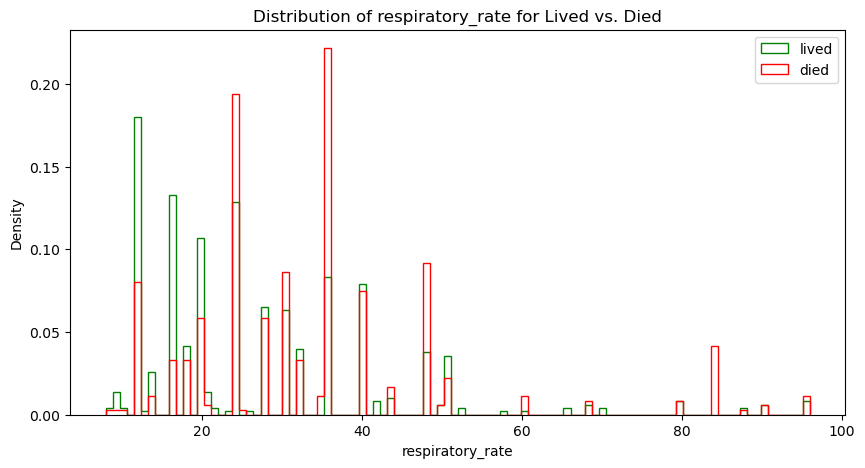

In [41]:
import numpy as np
import matplotlib.pyplot as plt
df_lived = data_cleaned[data_cleaned['outcome'] == 'lived']
df_died = data_cleaned[data_cleaned['outcome'] == 'died']

variables_to_plot = ["total_protein", "rectal_temp", "pulse", "respiratory_rate"]

for var in variables_to_plot:
    print(var)
    plt.figure(figsize=(10, 5))
    
    plt.hist(
        np.array(df_lived[var].dropna()), bins=100, histtype="step", 
        color="green", label="lived", density=True, stacked=True
    )
    
    plt.hist(
        np.array(df_died[var].dropna()), bins=100, histtype="step", 
        color="red", label="died", density=True, stacked=True
    )
    
    plt.legend(loc='upper right')
    plt.title(f"Distribution of {var} for Lived vs. Died")
    plt.xlabel(var)
    plt.ylabel("Density")
    plt.show()

## Total Protein
Horses that `lived` and `died` have total protein levels mostly concentrated around **5–10 g/dL**, with a slight shift indicating that higher total protein levels are more common in the `lived` group. Extremely high protein levels are rare and distributed similarly across both groups.

## Rectal Temperature
Horses that `lived` have rectal temperatures concentrated around **38°C**, while those that `died` display a broader distribution, with more extreme temperatures (<36°C or >40°C). This suggests that abnormal rectal temperatures may be associated with a higher risk of mortality.

## Pulse
Horses that `lived` have pulses concentrated between **40–80 bpm**, while those that `died` show a broader distribution, with elevated pulses above **100 bpm** being more common. Elevated pulse rates are likely associated with higher mortality risk.

## Respiratory Rate
Horses that `lived` have respiratory rates concentrated around **20–30 breaths per minute**, while those that `died` exhibit a broader distribution with peaks around **40 breaths per minute** and occurrences above **60 breaths per minute**. Elevated respiratory rates appear linked to higher mortality.

### Categorical Features

surgery


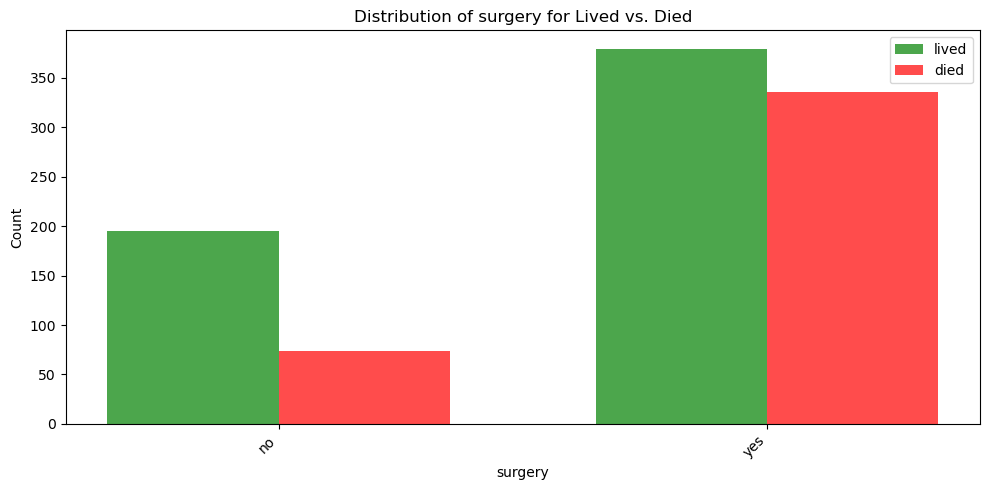

age


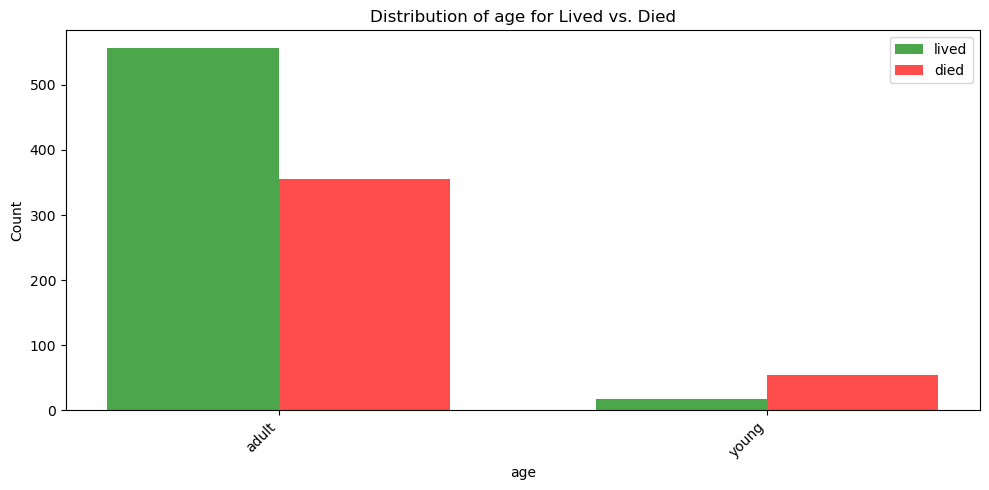

temp_of_extremities


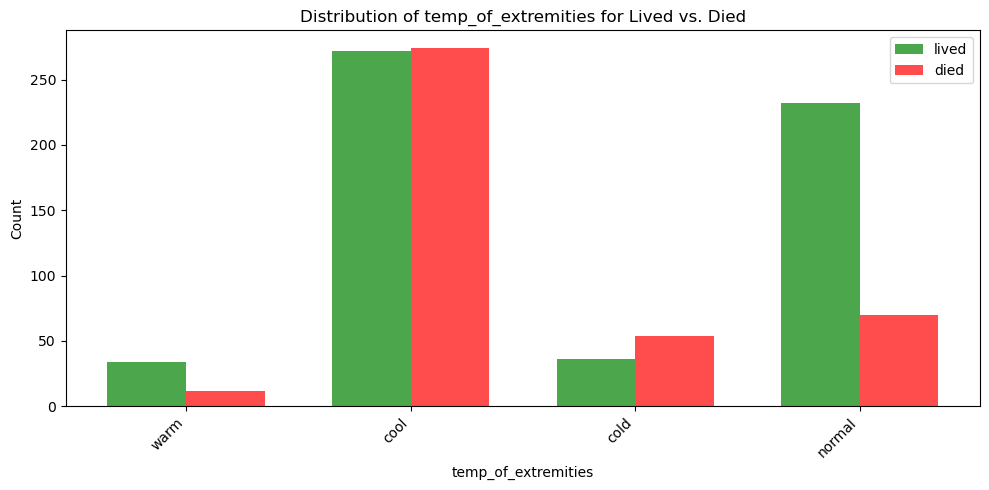

pain


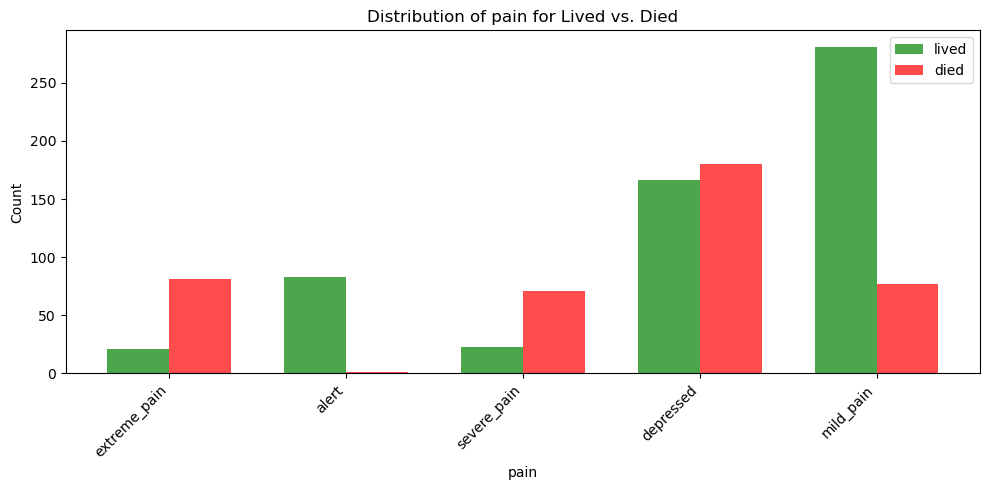

surgical_lesion


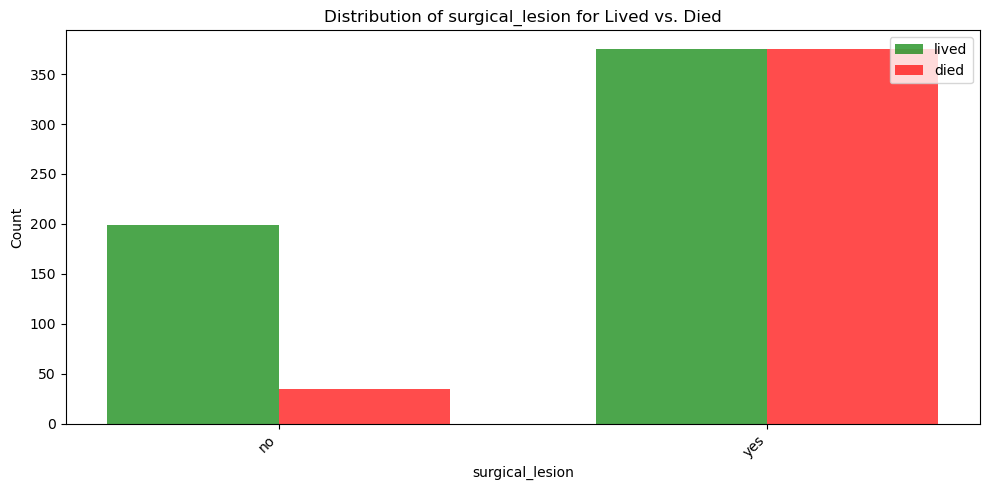

In [43]:
import matplotlib.pyplot as plt
import numpy as np

categorical_vars_to_plot = ["surgery", "age", "temp_of_extremities", "pain", "surgical_lesion"]

for var in categorical_vars_to_plot:
    print(var)
    plt.figure(figsize=(10, 5))
    
    lived_counts = df_lived[var].value_counts()
    died_counts = df_died[var].value_counts()
    
    categories = list(set(lived_counts.index).union(set(died_counts.index)))
    lived_counts = lived_counts.reindex(categories, fill_value=0)
    died_counts = died_counts.reindex(categories, fill_value=0)
    
    x = np.arange(len(categories)) 
    width = 0.35 

    plt.bar(x - width/2, lived_counts, width, color="green", alpha=0.7, label="lived")
    plt.bar(x + width/2, died_counts, width, color="red", alpha=0.7, label="died")
    
    plt.xticks(x, categories, rotation=45, ha="right")
    plt.title(f"Distribution of {var} for Lived vs. Died")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()


## Surgery
The plot shows that a higher number of horses that underwent surgery survived compared to those that died. Among horses that did not undergo surgery, survival still outnumbers deaths, but the gap is smaller. This suggests surgery may improve survival chances but is not the sole determining factor.

## Age
The plot shows that a majority of adult horses survived compared to those that died. Among young horses, deaths outnumber survivors. This indicates that adult horses generally have better survival outcomes than young horses.

## Extremity temperatures
The plot shows that horses with normal extremity temperatures have higher survival rates compared to deaths. Horses with cold extremities are more likely to die, while warm extremities are rare and have fewer deaths. This indicates that abnormal extremity temperatures, particularly cold, are associated with a higher risk of mortality.

## Pain
The plot shows that horses experiencing mild pain have significantly higher survival rates compared to deaths. For horses with severe or extreme pain, deaths are more common. Among horses labeled as `alert`, survival is higher, but for those marked as `depressed`, deaths and survivals are almost equal. Higher pain levels are strongly associated with increased mortality.

## Surgical lesions
The plot shows that horses with surgical lesions (yes) have nearly equal counts of survival and death. However, for horses without surgical lesions, survival significantly outnumbers deaths. This suggests that the presence of a surgical lesion is associated with a higher risk of mortality.

### Machine Learning 

In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

file_path = 'train(1).csv'  
data = pd.read_csv(file_path)

y = data['outcome'].map({'lived': 0, 'died': 1, 'euthanized': 2})

object_columns = data.select_dtypes(include=['object']).columns

encoders = {}
for col in object_columns:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col].astype(str))
    encoders[col] = encoder

X = data.drop(columns=['outcome'])

print(X.dtypes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Model trained successfully!")

surgery                    int64
age                        int64
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities        int64
peripheral_pulse           int64
mucous_membrane            int64
capillary_refill_time      int64
pain                       int64
peristalsis                int64
abdominal_distention       int64
nasogastric_tube           int64
nasogastric_reflux         int64
nasogastric_reflux_ph    float64
rectal_exam_feces          int64
abdomen                    int64
packed_cell_volume       float64
total_protein            float64
abdomo_appearance          int64
abdomo_protein           float64
surgical_lesion            int64
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                    int64
dtype: object
Model trained successfully!


In [31]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

report = classification_report(y_test, y_pred, target_names=['lived', 'died', 'euthanized'])
print("Classification Report:\n", report)


Model Accuracy: 0.7044534412955465
Classification Report:
               precision    recall  f1-score   support

       lived       0.77      0.73      0.75       121
        died       0.57      0.76      0.65        72
  euthanized       0.84      0.57      0.68        54

    accuracy                           0.70       247
   macro avg       0.73      0.69      0.70       247
weighted avg       0.73      0.70      0.71       247



The model achieved an overall accuracy of 70.4%, with strong performance in predicting "lived" cases (77% precision, 73% recall) and "euthanized" cases showing high precision (84%) but lower recall (57%), indicating some missed true positives. Predictions for "died" cases had moderate precision (57%) but high recall (76%), meaning it identifies most true cases but with more false positives. Overall, the model demonstrates balanced performance, with room for improvement in recall for "euthanized" and precision for "died."


In [32]:
def predict_horse_outcome(features, X_columns, model, encoders, categorical_columns):
    """
    Predict the outcome of a horse based on key features using the trained model.
    
    Parameters:
    features (dict): A dictionary containing feature names and their values.
    X_columns (list): List of all feature columns used in training.
    model: Trained machine learning model.
    encoders (dict): Encoders used for categorical feature transformation.
    categorical_columns (list): List of categorical columns.

    Returns:
    str: Predicted outcome (e.g., 'lived', 'died', 'euthanized').
    """
    input_data = pd.DataFrame([features])

    for col in X_columns:
        if col not in input_data.columns:
            input_data[col] = 0  

    input_data = input_data[X_columns]

    for column in categorical_columns:
        if column in input_data.columns:
            if input_data[column].iloc[0] not in encoders[column].classes_:
                input_data[column] = encoders[column].classes_[0]
            input_data[column] = encoders[column].transform(input_data[column])

    prediction = model.predict(input_data)

    outcome_map = {0: 'lived', 1: 'died', 2: 'euthanized'}
    return outcome_map[prediction[0]]

In [33]:
example_features = {
    'surgery': 1,  
    'pulse': 60,  
    'total_protein': 6.5,  
    'age': 15,  
    'respiratory_rate': 15,  
    'temp_of_extremities': 1,  
    'pain': 1,  
    'surgical_lesion': 0  
}

predicted_outcome = predict_horse_outcome(example_features, X.columns, model, encoders, categorical_columns)
print("Predicted Outcome:", predicted_outcome)

Predicted Outcome: lived


In [34]:
example_features = {
    'surgery': 0,  
    'pulse': 95,  
    'total_protein': 6.5,  
    'age': 5,  
    'respiratory_rate': 35,  
    'temp_of_extremities': 4,  
    'pain': 3,  
    'surgical_lesion': 1  
}

predicted_outcome = predict_horse_outcome(example_features, X.columns, model, encoders, categorical_columns)
print("Predicted Outcome:", predicted_outcome)

Predicted Outcome: died


Model still shows lived despite extreme input values indicating poor health.

## Threshold

In [35]:
input_data = pd.DataFrame([example_features])

for col in X.columns:
    if col not in input_data.columns:
        input_data[col] = 0 

input_data = input_data[X.columns]

for column in categorical_columns:
    if column in input_data.columns:
        if input_data[column].iloc[0] not in encoders[column].classes_:
           
            input_data[column] = encoders[column].classes_[0]
        input_data[column] = encoders[column].transform(input_data[column])

input_data = input_data.apply(pd.to_numeric, errors='coerce')
probabilities = model.predict_proba(input_data)

In [36]:
example_features = {
    'surgery': 1,  
    'pulse': 60,  
    'total_protein': 6.5,  
    'age': 15,  
    'respiratory_rate': 15,  
    'temp_of_extremities': 1,  
    'pain': 1,  
    'surgical_lesion': 0  
}

threshold = 0.2
predicted_class = "dead" if probabilities[0][1] > threshold else "lived"
print("Predicted Outcome:", predicted_class)

Predicted Outcome: dead


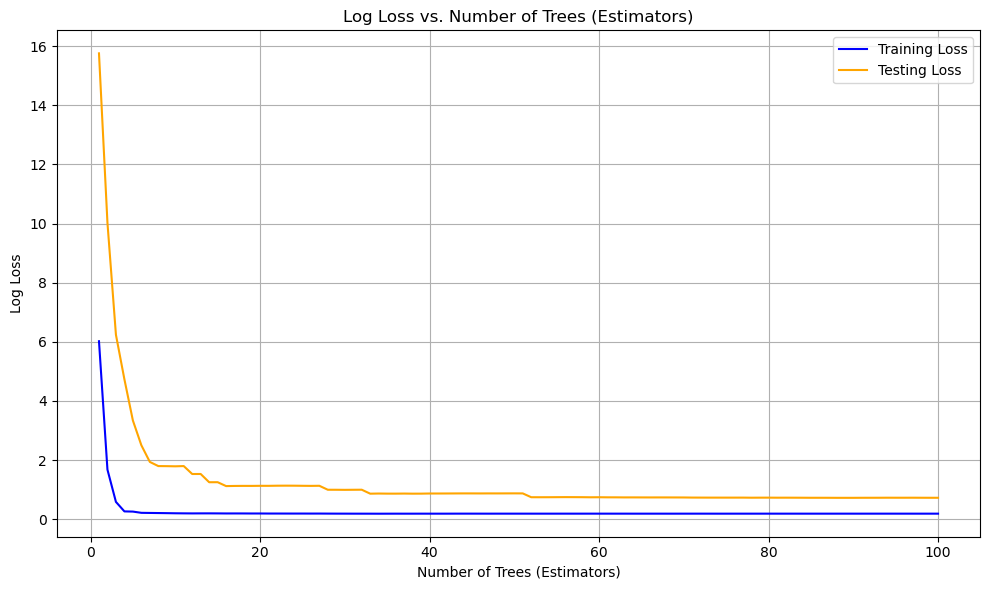

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier

train_losses = []
test_losses = []

for i in range(1, 101): 
    partial_model = RandomForestClassifier(n_estimators=i, random_state=42)
    partial_model.fit(X_train, y_train)
    
    y_train_proba = partial_model.predict_proba(X_train)
    train_loss = log_loss(y_train, y_train_proba)
    train_losses.append(train_loss)
    
    y_test_proba = partial_model.predict_proba(X_test)
    test_loss = log_loss(y_test, y_test_proba)
    test_losses.append(test_loss)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), train_losses, label="Training Loss", color="blue")
plt.plot(range(1, 101), test_losses, label="Testing Loss", color="orange")
plt.title("Log Loss vs. Number of Trees (Estimators)")
plt.xlabel("Number of Trees (Estimators)")
plt.ylabel("Log Loss")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Deep Learning Model

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename = "train(1).csv"

VarNames = [
    "surgery", "age", "hospital_number", "rectal_temp", "pulse", "respiratory_rate",
    "temp_of_extremities", "peripheral_pulse", "mucous_membrane", "capillary_refill_time",
    "pain", "peristalsis", "abdominal_distention", "nasogastric_tube", "nasogastric_reflux",
    "nasogastric_reflux_ph", "rectal_exam_feces", "abdomen", "packed_cell_volume",
    "total_protein", "abdomo_appearance", "abdomo_protein", "surgical_lesion", "lesion_1",
    "lesion_2", "lesion_3", "cp_data", "outcome"
]

df = pd.read_csv(filename, names=VarNames, skiprows=1)

categorical_columns = [
    "surgery", "age", "temp_of_extremities", "peripheral_pulse", "mucous_membrane",
    "capillary_refill_time", "pain", "peristalsis", "abdominal_distention",
    "nasogastric_tube", "nasogastric_reflux", "rectal_exam_feces", "abdomen",
    "abdomo_appearance", "cp_data", "outcome"
]
numerical_columns = [
    "hospital_number", "rectal_temp", "pulse", "respiratory_rate", "nasogastric_reflux_ph",
    "packed_cell_volume", "total_protein", "abdomo_protein", "surgical_lesion", "lesion_1",
    "lesion_2", "lesion_3"
]

for col in categorical_columns:
    df[col] = df[col].astype('category').cat.codes

N_Max = 1000  
N_Train = int(N_Max * 0.8)

Train_Sample = df[:N_Train]
Test_Sample = df[N_Train:N_Max]

X_Train = np.array(Train_Sample[numerical_columns + categorical_columns[:-1]])  
y_Train = np.array(Train_Sample["outcome"]) 

X_Test = np.array(Test_Sample[numerical_columns + categorical_columns[:-1]])  
y_Test = np.array(Test_Sample["outcome"])  

print("Processed Training Features:\n", X_Train[:5])
print("Processed Training Target:\n", y_Train[:5])

Processed Training Features:
 [[530001 38.1 132.0 24.0 6.5 57.0 8.5 3.4 'yes' 2209 0 0 1 0 1 3 2 2 1 0
  3 2 0 1 1 2 0]
 [533836 37.5 88.0 12.0 2.0 33.0 64.0 2.0 'yes' 2208 0 0 1 0 1 2 4 2 3 0
  0 0 1 0 1 2 0]
 [529812 38.3 120.0 28.0 3.5 37.0 6.4 3.4 'yes' 5124 0 0 1 0 1 3 5 1 2 3
  0 2 2 0 0 2 0]
 [5262541 37.1 72.0 30.0 2.0 53.0 7.0 3.9 'yes' 2208 0 0 1 0 0 3 5 2 3 3
  0 2 1 1 1 1 1]
 [5299629 38.0 52.0 48.0 7.0 47.0 7.3 2.6 'no' 0 0 0 0 0 2 2 3 1 0 3 1 2
  0 3 3 1 1]]
Processed Training Target:
 [0 1 2 2 2]


#### The output shows the preprocessed training features (`X_Train`) and targets (`y_Train`). Features include numerical columns like `rectal_temp` and encoded categorical values (`yes`/`no` mapped to `1`/`0`). The target column (`outcome`) is encoded as integers (`0` for `lived`, `1` for `died`, `2` for `euthanized`). Each row represents a training sample with all features converted to numeric format, ensuring compatibility with machine learning models. Next steps include applying feature scaling for consistent ranges and proceeding to model training and validation.

In [48]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import pandas as pd

df = pd.read_csv("train(1).csv")

numerical_columns = ["rectal_temp", "pulse", "respiratory_rate", 
                     "packed_cell_volume", "total_protein", "abdomo_protein", 
                     "lesion_1", "lesion_2", "lesion_3"]
categorical_columns = ["surgery", "age", "temp_of_extremities", 
                       "peripheral_pulse", "mucous_membrane", "capillary_refill_time", 
                       "pain", "peristalsis", "abdominal_distention", 
                       "nasogastric_tube", "nasogastric_reflux", "rectal_exam_feces", 
                       "abdomen", "abdomo_appearance", "cp_data"]

scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_categorical = encoder.fit_transform(df[categorical_columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical, 
                                      columns=encoder.get_feature_names_out(categorical_columns))

df_preprocessed = pd.concat([df[numerical_columns], encoded_categorical_df], axis=1)

print(df_preprocessed.head())

   rectal_temp     pulse  respiratory_rate  packed_cell_volume  total_protein  \
0     0.500000  0.662338          0.181818            0.653846       0.058480   
1     0.388889  0.376623          0.045455            0.192308       0.707602   
2     0.537037  0.584416          0.227273            0.269231       0.033918   
3     0.314815  0.272727          0.250000            0.576923       0.040936   
4     0.481481  0.142857          0.454545            0.461538       0.044444   

   abdomo_protein  lesion_1  lesion_2  lesion_3  surgery_no  ...  \
0            0.33  0.053734       0.0       0.0         0.0  ...   
1            0.19  0.053710       0.0       0.0         0.0  ...   
2            0.33  0.124641       0.0       0.0         0.0  ...   
3            0.38  0.053710       0.0       0.0         0.0  ...   
4            0.25  0.000000       0.0       0.0         1.0  ...   

   abdomen_distend_large  abdomen_distend_small  abdomen_firm  abdomen_normal  \
0                    0.

The dataset preprocessing normalizes numerical features using `MinMaxScaler` (scaled between 0 and 1) and converts categorical features into binary columns using `OneHotEncoder`. The resulting `df_preprocessed` combines these processed features, ensuring all data is numeric and ready for machine learning models.

Epoch 1/20


/home/farib/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3977 - loss: 74944.5000 - val_accuracy: 0.2915 - val_loss: 9039.2012
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4131 - loss: 5982.1621 - val_accuracy: 0.2915 - val_loss: 1437.1173
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3744 - loss: 1460.4749 - val_accuracy: 0.3117 - val_loss: 3073.2107
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3309 - loss: 3130.6367 - val_accuracy: 0.2915 - val_loss: 775.5812
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3923 - loss: 2283.0039 - val_accuracy: 0.2186 - val_loss: 2402.2932
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3755 - loss: 2537.2915 - val_accuracy: 0.4656 - val_loss: 1330.1333
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3688 - loss: 2375.4792 - val_accuracy: 0.4777 - val_loss: 1037.8608
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3604 - loss: 1134.9358 

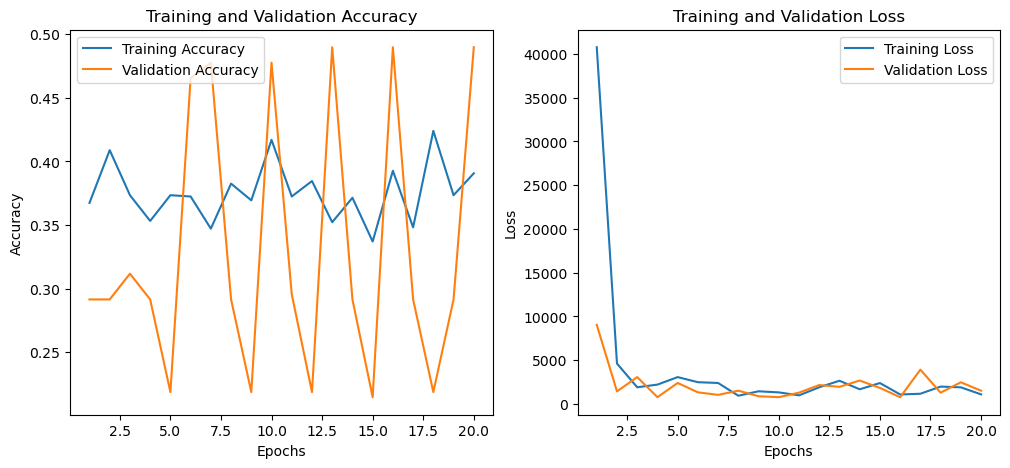

In [49]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

input_dim = X_train.shape[1]  

model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),  
    Dense(32, activation='relu'),  
    Dense(3, activation='softmax') 
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,  
    epochs=20,         
    batch_size=32,    
    validation_data=(X_test, y_test)  
)

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
`
plot_training_history(history)

The model shows signs of overfitting, with training accuracy improving but validation accuracy stagnating and validation loss fluctuating. This suggests the model has plateaued, and further epochs may not help. To improve, consider adding regularization, simplifying the model, tuning the learning rate, or addressing data preprocessing and class imbalance.

/home/farib/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3549 - loss: 172302.0000 - val_accuracy: 0.2915 - val_loss: 20838.8027
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3835 - loss: 84759.2500 - val_accuracy: 0.2915 - val_loss: 15700.6953
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3705 - loss: 73809.6016 - val_accuracy: 0.3036 - val_loss: 3625.6975
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3319 - loss: 52056.2773 - val_accuracy: 0.4899 - val_loss: 4722.8916
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4109 - loss: 31002.4336 - val_accuracy: 0.3036 - val_loss: 173.0155
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3577 - loss: 31064.6875 - val_accuracy: 0.2955 - val_loss: 12.5284
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3549 - loss: 20577.2676 - val_accuracy: 0.2186 - val_loss: 1.1529
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3478 - 

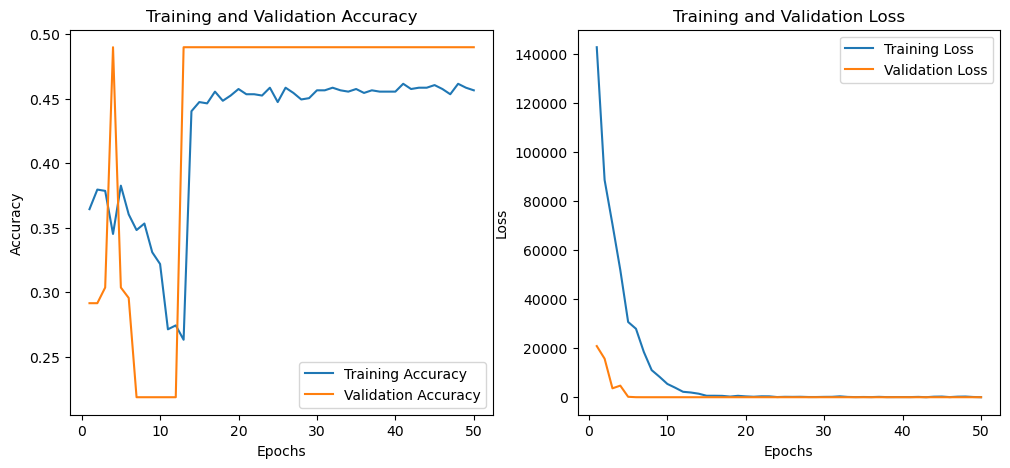

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

input_dim = X_train.shape[1]

model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.001), input_shape=(input_dim,)),  
    Dropout(0.5),  
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)), 
    Dropout(0.5), 
    Dense(3, activation='softmax') 
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5,  
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=50,  
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)


The plots indicate that while the training accuracy steadily improves and stabilizes, the validation accuracy fluctuates significantly early on before aligning at around 49%, suggesting the model struggles to generalize. Training and validation loss decrease, but the gap and instability in early epochs suggest overfitting.

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


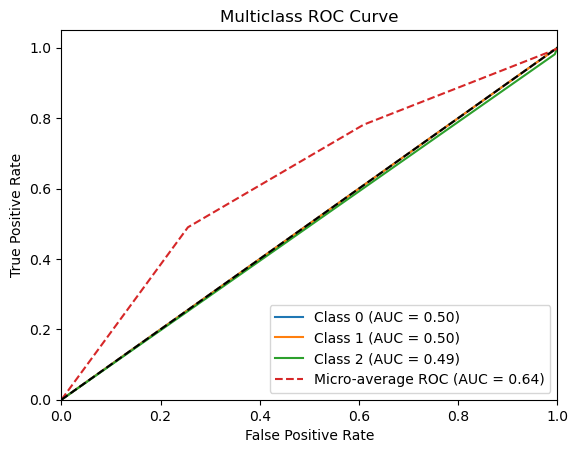

Class 0 AUC-ROC: 0.50
Class 1 AUC-ROC: 0.50
Class 2 AUC-ROC: 0.49
Micro-average AUC-ROC: 0.64


In [57]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np


y_test_binarized = label_binarize(y_test, classes=[0, 1, 2]) 
n_classes = y_test_binarized.shape[1]

y_pred_proba = model.predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC (AUC = {roc_auc["micro"]:.2f})', linestyle='--')

plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()

for i in range(n_classes):
    print(f"Class {i} AUC-ROC: {roc_auc[i]:.2f}")
print(f"Micro-average AUC-ROC: {roc_auc['micro']:.2f}")


The model's poor AUC scores (close to random guessing) suggest low performance in distinguishing between classes.